In [23]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Input
LOD = ctrl.Antecedent(np.linspace(0, 6, 1000), 'LOD')            # Left Obstacle Distance
ROD = ctrl.Antecedent(np.linspace(0, 6, 1000), 'ROD')            # Right Obstacle Distance
FOD = ctrl.Antecedent(np.linspace(0, 6, 1000), 'FOD')            # Front Obstacle Distance

ACT = ctrl.Antecedent(np.linspace(-1, 1, 1000), 'ACT')           # Action
ANG = ctrl.Antecedent(np.linspace(-np.pi, np.pi, 1000), 'ANG')   # Heading Angle

# Output 
LWV = ctrl.Consequent(np.linspace(0, 3, 1000), 'LWV')            # Left Wheel Velocity
RWV = ctrl.Consequent(np.linspace(0, 3, 1000), 'RWV')            # Right Wheel Velocity

/home/tinzog/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


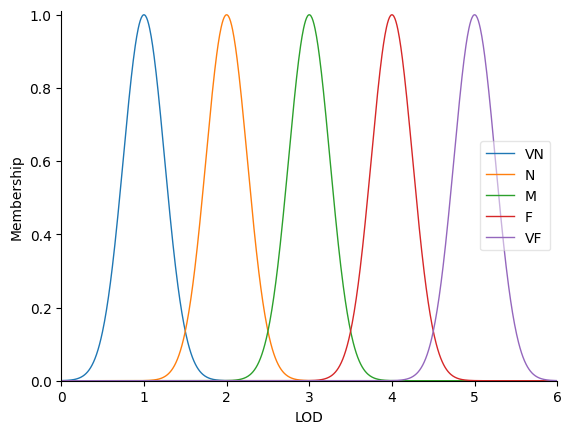

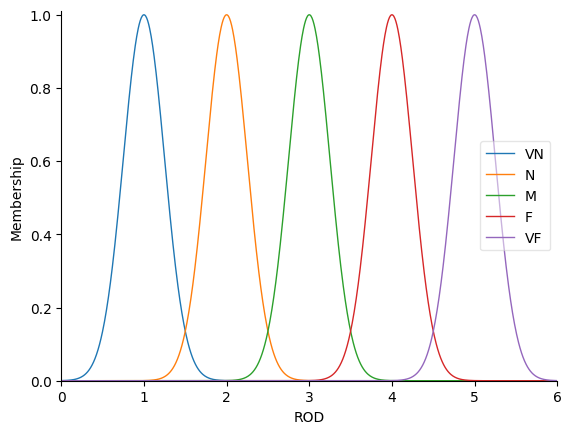

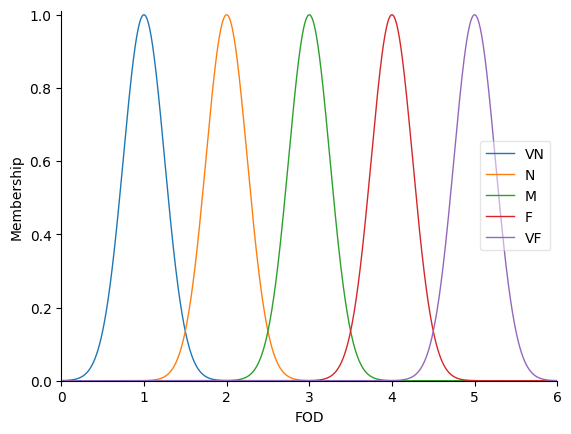

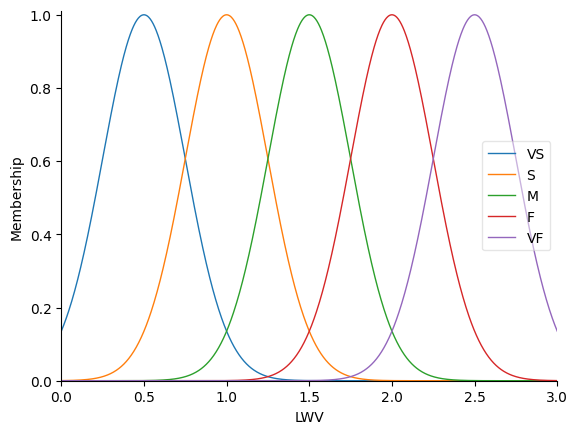

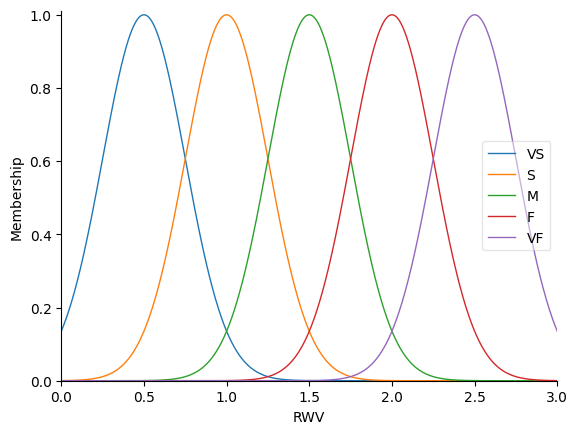

In [25]:
# Membership functions

# LOD
LOD['VN'] = fuzz.gaussmf(LOD.universe, 1.0, 0.25)   # Very near
LOD['N']  = fuzz.gaussmf(LOD.universe, 2.0, 0.25)   # Near
LOD['M']  = fuzz.gaussmf(LOD.universe, 3.0, 0.25)   # Medium
LOD['F']  = fuzz.gaussmf(LOD.universe, 4.0, 0.25)   # Far
LOD['VF'] = fuzz.gaussmf(LOD.universe, 5.0, 0.25)   # Very far
LOD.view()

# ROD
ROD['VN'] = fuzz.gaussmf(ROD.universe, 1.0, 0.25)
ROD['N']  = fuzz.gaussmf(ROD.universe, 2.0, 0.25)
ROD['M']  = fuzz.gaussmf(ROD.universe, 3.0, 0.25)
ROD['F']  = fuzz.gaussmf(ROD.universe, 4.0, 0.25)
ROD['VF'] = fuzz.gaussmf(ROD.universe, 5.0, 0.25)
ROD.view()

# FOD
FOD['VN'] = fuzz.gaussmf(FOD.universe, 1.0, 0.25)
FOD['N']  = fuzz.gaussmf(FOD.universe, 2.0, 0.25)
FOD['M']  = fuzz.gaussmf(FOD.universe, 3.0, 0.25)
FOD['F']  = fuzz.gaussmf(FOD.universe, 4.0, 0.25)
FOD['VF'] = fuzz.gaussmf(FOD.universe, 5.0, 0.25)
FOD.view()

ACT['OA'] = fuzz.trimf(ACT.universe, [-1, -1, 1])     # Obstacle avoidance
ACT['TS'] = fuzz.trimf(ACT.universe, [-1,  1, 1])     # Target seeking

ANG['N'] = fuzz.trimf(ANG.universe, [-np.pi, -np.pi, np.pi]) # Negative
ANG['P'] = fuzz.trimf(ANG.universe, [-np.pi,  np.pi, np.pi]) # Positive

LWV['VS'] = fuzz.gaussmf(LWV.universe, 0.5, 0.25) # Very slow
LWV['S']  = fuzz.gaussmf(LWV.universe, 1.0, 0.25) # Slow
LWV['M']  = fuzz.gaussmf(LWV.universe, 1.5, 0.25) # M
LWV['F']  = fuzz.gaussmf(LWV.universe, 2.0, 0.25) # Fast
LWV['VF'] = fuzz.gaussmf(LWV.universe, 2.5, 0.25) # Very fast
LWV.view()

RWV['VS'] = fuzz.gaussmf(RWV.universe, 0.5, 0.25) # Very slow
RWV['S']  = fuzz.gaussmf(RWV.universe, 1.0, 0.25) # Slow
RWV['M']  = fuzz.gaussmf(RWV.universe, 1.5, 0.25) # M
RWV['F']  = fuzz.gaussmf(RWV.universe, 2.0, 0.25) # Fast
RWV['VF'] = fuzz.gaussmf(RWV.universe, 2.5, 0.25) # Very fast
RWV.view()

In [26]:
rule = []

rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['N'] & ROD['N'], (LWV['S'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['N'] & ROD['M'], (LWV['M'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['N'] & ROD['F'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['M'] & ROD['N'], (LWV['S'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['M'] & ROD['M'], (LWV['F'], RWV['M'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['M'] & ROD['F'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['F'] & ROD['N'], (LWV['S'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['F'] & ROD['M'], (LWV['F'], RWV['M'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['N'] & FOD['F'] & ROD['F'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['M'] & FOD['N'] & ROD['N'], (LWV['M'], RWV['F'])))

rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['VN'] & ROD['VN'], (LWV['VS'], RWV['VS'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VF'] & FOD['VN'] & ROD['N'], (LWV['VS'], RWV['VF'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['VN'] & ROD['M'], (LWV['F'], RWV['VS'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['VN'] & ROD['F'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['VN'] & ROD['VF'], (LWV['VF'], RWV['VS'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['N'] & ROD['VN'], (LWV['S'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['N'] & ROD['N'], (LWV['S'], RWV['VS'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['N'] & ROD['M'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['N'] & ROD['F'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['OA'] & LOD['VN'] & FOD['N'] & ROD['VF'], (LWV['VF'], RWV['VS'])))

rule.append(ctrl.Rule(ACT['TS'] & LOD['N'] & FOD['F'] & ROD['M'] & ANG['P'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['N'] & FOD['M'] & ROD['F'] & ANG['P'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['N'] & FOD['M'] & ROD['N'] & ANG['N'], (LWV['S'], RWV['F'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['F'] & FOD['N'] & ROD['M'] & ANG['N'], (LWV['S'], RWV['F'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['F'] & FOD['M'] & ROD['N'] & ANG['P'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['F'] & FOD['F'] & ROD['F'] & ANG['N'], (LWV['S'], RWV['F'])))

rule.append(ctrl.Rule(ACT['TS'] & LOD['VN'] & FOD['F'] & ROD['N'] & ANG['P'], (LWV['S'], RWV['VS'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['VN'] & FOD['M'] & ROD['VF'] & ANG['P'], (LWV['VF'], RWV['VS'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['N'] & FOD['F'] & ROD['F'] & ANG['P'], (LWV['F'], RWV['S'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['M'] & FOD['F'] & ROD['N'] & ANG['N'], (LWV['S'], RWV['M'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['F'] & FOD['M'] & ROD['N'] & ANG['N'], (LWV['M'], RWV['F'])))
rule.append(ctrl.Rule(ACT['TS'] & LOD['F'] & FOD['VF'] & ROD['N'] & ANG['N'], (LWV['M'], RWV['VF'])))

#Control system
WV_control = ctrl.ControlSystem(rule)
WV_simulation = ctrl.ControlSystemSimulation(WV_control)


In [27]:
WV_simulation.input['LOD'] = 3
WV_simulation.input['ROD'] = 4
WV_simulation.input['FOD'] = 2
WV_simulation.input['ACT'] = 0.8
WV_simulation.input['ANG'] = -1.2

WV_simulation.compute()
print('WV: ',WV_simulation.output['LWV'], WV_simulation.output['RWV'])




WV:  1.5003604961830264 1.4996395038169659
